In [8]:
# FIXME:第一部分：项目框架与数据准备
# FIXME:项目启动与数据探索

import pandas as pd
df = pd.read_csv('used_car_train_20200313.csv', sep=' ')
# 设置Pandas的显示选项，使其能够显示所有列和行
pd.set_option('display.max_columns', None) # 显示所有列
pd.set_option('display.max_rows', None)    # 显示所有行

In [2]:
# TODO:数据加载与概览
# 1. 查看数据基本信息
print("--- 数据集基本信息 ---")
df.info() # 数据集有多少行、多少列，以及每一列的数据类型和有无缺失值等信息。

--- 数据集基本信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null 

In [9]:
# 2. 查看数值型数据的描述性统计
print("\n--- 数值特征描述性统计 ---")
print(df.describe())    # 计算数值列的计数、平均值、标准差、最小值、最大值和四分位数


--- 数值特征描述性统计 ---
              SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000   

In [10]:
# 3. 查看前5行数据，直观感受数据长什么样
print("\n--- 数据前5行预览 ---")
print(df.head())



--- 数据前5行预览 ---
   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
0       12.5               0.0        1046       0          0   20160404   
1       15.0                 -        4366       0          0   20160309   
2       12.5               0.0        2806       0          0   20160402   
3       15.0               0.0         434       0          0   20160312   
4        5.0               0.0        6977       0          0   20160313   

   price        v_0       v_1       v_2

In [1]:
# TODO:核心特征分布分析
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('used_car_train_20200313.csv', sep=' ')

# 设置中文字体，防止图表中的中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

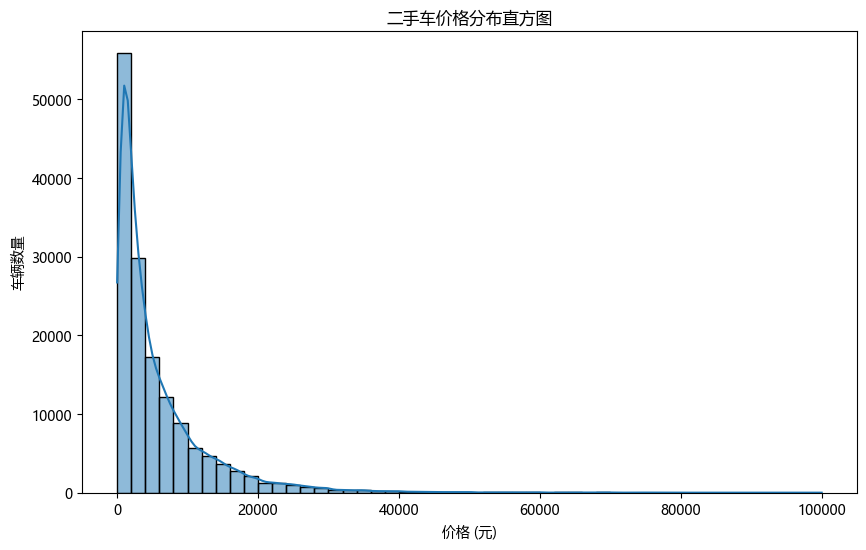

In [2]:
# --- 1. 价格(price)分布图 ---
plt.figure(figsize=(10, 6)) # 创建一个10x6英寸的画布
sns.histplot(df['price'], bins=50, kde=True) # 绘制直方图，kde=True会画出密度曲线
plt.title('二手车价格分布直方图')
plt.xlabel('价格 (元)')
plt.ylabel('车辆数量')
plt.show() # 显示图表

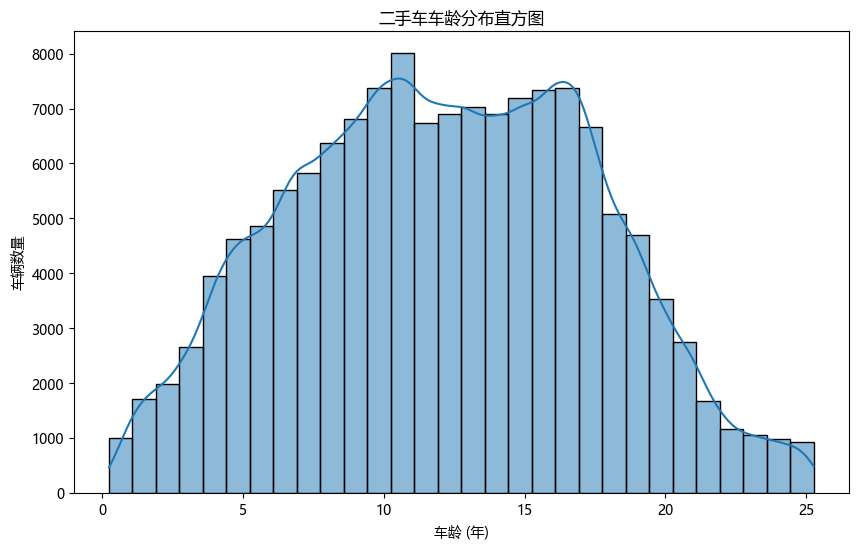

In [3]:
# 2. 创建“车龄”特征并分析其分布
# 将日期列从数字格式转换为pandas可以理解的日期时间格式
# errors='coerce'表示如果转换出错，就将其设为NaT（Not a Time）
df['regDate'] = pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')
df['creatDate'] = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')

# 计算车龄（单位：年）
# (df - df) 会得到一个时间差（Timedelta）对象
#.dt.days 可以提取出天数，再除以365得到年
df['car_age'] = (df['creatDate'] - df['regDate']).dt.days / 365

# 绘制车龄分布直方图
plt.figure(figsize=(10, 6))
# 只看车龄在0到30年之间的数据，过滤掉异常值
sns.histplot(df['car_age'].dropna(), bins=30, kde=True)
plt.title('二手车车龄分布直方图')
plt.xlabel('车龄 (年)')
plt.ylabel('车辆数量')
plt.show()